# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [60]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [61]:
from src.RQ1_forecast import *

In [62]:
num_samples = 100

In [63]:
data_address1 = '/home/dev/deepts/experiments/n_beats/electricity/1B'

# metric section

In [64]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 31725.06it/s]
100%|###########| 100/100 [00:02<00:00, 38.04it/s]


In [65]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,50.859467,133.852386,235.0,9.791667,8.031874,0.694381,0.727077,0.954545,NaN,27.775250,46.115160,0.166667,133.852383,0.166667,221.589605,0.166667
1,1,1.0,158.041341,232.281860,2499.0,104.125000,9.577165,1.010572,0.089807,0.086877,NaN,40.422865,312.824510,0.666667,232.281853,0.666667,151.739195,0.666667
2,2,2.0,0.997148,18.990461,190.0,7.916667,8.673073,0.091233,0.100236,0.105930,NaN,3.649314,9.563790,0.291667,18.990461,0.291667,28.417131,0.291667
3,3,3.0,3798.849609,1024.708740,10468.0,436.166667,48.398763,0.882175,0.094185,0.099842,NaN,35.287017,656.483029,0.458333,1024.708847,0.458333,1392.934665,0.458333
4,4,4.0,415.231893,428.362610,4087.0,170.291667,25.383302,0.703157,0.107112,0.105146,NaN,28.126273,481.307825,0.541667,428.362610,0.541667,375.417395,0.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2242,316.0,1637.539388,815.380310,6671.0,277.958333,30.914619,1.098968,0.217055,0.177202,NaN,43.958721,1077.115317,0.666667,815.380295,0.666667,553.645273,0.666667
2243,2243,317.0,1215.729004,467.196350,1058.0,44.083333,31.192686,0.624073,0.333264,0.373754,NaN,24.962921,241.682726,0.541667,467.196331,0.541667,692.709936,0.541667
2244,2244,318.0,310835.333333,11510.671875,50192.0,2091.333333,267.793565,1.790974,0.221347,0.244094,NaN,71.638967,5693.809106,0.291667,11510.672485,0.291667,17327.535864,0.291667
2245,2245,319.0,113493.177083,5784.239258,10581.0,440.875000,169.860660,1.418869,0.416399,0.572046,NaN,56.754749,1719.701791,0.416667,5784.239182,0.416667,9848.776572,0.416667


In [66]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [67]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [68]:
sort_metric_list(metrics_list1)


In [69]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,50.859467,133.852386,235.0,9.791667,8.031874,0.694381,0.727077,0.954545,NaN,27.775250,46.115160,0.166667,133.852383,0.166667,221.589605,0.166667
1,321,0.0,128.995951,143.988708,264.0,11.000000,8.026991,0.747419,0.596735,0.602492,NaN,29.896782,69.849572,0.500000,143.988716,0.500000,218.127861,0.500000
2,642,0.0,99.945129,139.056976,284.0,11.833333,8.025109,0.721989,0.481160,0.665316,NaN,28.879559,53.232298,0.333333,139.056973,0.333333,224.881648,0.333333
3,963,0.0,59.932780,150.686737,189.0,7.875000,8.024132,0.782466,1.286802,1.131255,NaN,31.298658,111.851152,0.416667,150.686742,0.416667,189.522331,0.416667
4,1284,0.0,56.590769,136.114685,166.0,6.916667,8.019890,0.707172,1.542015,0.980929,NaN,28.286900,106.854081,0.250000,136.114697,0.250000,165.375313,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,64184.776042,4983.424805,74254.0,3093.916667,287.494114,0.722250,0.066983,0.064053,NaN,28.890012,8519.736523,0.833333,4983.424805,0.833333,1447.113086,0.833333
2243,1283,320.0,35532.177083,3602.441650,78719.0,3279.958333,287.257349,0.522534,0.046206,0.045984,NaN,20.901361,3984.202783,0.625000,3602.441650,0.625000,3220.680518,0.625000
2244,1604,320.0,184668.000000,8915.761719,74298.0,3095.750000,287.146950,1.293728,0.120412,0.111542,NaN,51.749119,15950.778418,0.916667,8915.761230,0.916667,1880.744043,0.916667
2245,1925,320.0,330724.145833,11877.606445,68217.0,2842.375000,287.030085,1.724210,0.169417,0.152748,NaN,68.968416,21379.691162,1.000000,11877.606201,1.000000,2375.521240,1.000000


# Forecast section

In [70]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 30384.79it/s]
100%|###########| 100/100 [05:55<00:00,  3.55s/it]


In [71]:
len(forcast_list1)

100

In [72]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2014-05-26 20:00:00,9.0,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,...,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975
1,1,0,2014-05-26 21:00:00,10.0,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,...,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023
2,1,0,2014-05-26 22:00:00,22.0,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,...,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388
3,1,0,2014-05-26 23:00:00,20.0,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,...,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192
4,1,0,2014-05-27 00:00:00,13.0,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,...,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,...,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200,3252.139200
53924,1,2246,2014-06-02 16:00:00,4120.0,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,...,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400,3549.443400
53925,1,2246,2014-06-02 17:00:00,3951.0,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,...,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900,3536.192900
53926,1,2246,2014-06-02 18:00:00,3907.0,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,...,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900,3665.901900


In [73]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=321)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [74]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,...,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,-0.318975,0,-0.318975,5.579081e-17,NaN
1,1,0,2014-05-26 21:00:00,10.0,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,...,2.294023,2.294023,2.294023,2.294023,2.294023,2.294023,0,2.294023,4.463264e-16,NaN
2,1,0,2014-05-26 22:00:00,22.0,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,...,0.897388,0.897388,0.897388,0.897388,0.897388,0.897388,0,0.897388,0.000000e+00,NaN
3,1,0,2014-05-26 23:00:00,20.0,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,...,5.648192,5.648192,5.648192,5.648192,5.648192,5.648192,0,5.648192,3.570612e-15,NaN
4,1,0,2014-05-27 00:00:00,13.0,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,...,11.815376,11.815376,11.815376,11.815376,11.815376,11.815376,0,11.815376,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1926,2014-06-02 16:00:00,6.0,5.127603,5.127603,5.127603,5.127603,5.127603,5.127603,...,5.127603,5.127603,5.127603,5.127603,5.127603,5.127603,0,5.127603,8.926529e-16,NaN
165,1,1926,2014-06-02 17:00:00,10.0,4.687035,4.687035,4.687035,4.687035,4.687035,4.687035,...,4.687035,4.687035,4.687035,4.687035,4.687035,4.687035,0,4.687035,0.000000e+00,NaN
166,1,1926,2014-06-02 18:00:00,9.0,6.175229,6.175229,6.175229,6.175229,6.175229,6.175229,...,6.175229,6.175229,6.175229,6.175229,6.175229,6.175229,0,6.175229,1.785306e-15,NaN
167,1,1926,2014-06-02 19:00:00,9.0,6.312434,6.312434,6.312434,6.312434,6.312434,6.312434,...,6.312434,6.312434,6.312434,6.312434,6.312434,6.312434,0,6.312434,8.926529e-16,NaN


In [75]:
target_forcast_series = get_forcast_target(forcast_list1)

In [76]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

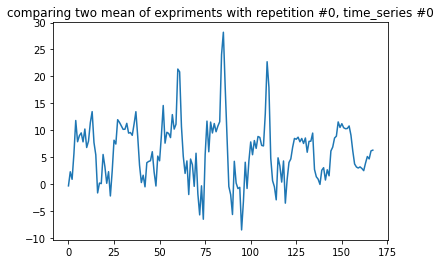

In [77]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [90]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[34]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[93]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[0]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[57]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [91]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.4944184839044652
percentage of underprediction of best repetition for experiment A = 0.6718216881768284
percentage of underprediction of highest repetition for experiment A = 0.38050734312416556
percentage of underprediction of lowest repetition for experiment A = 0.7995846313603323


In [92]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(57, 0)

In [93]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [94]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (0, 85)


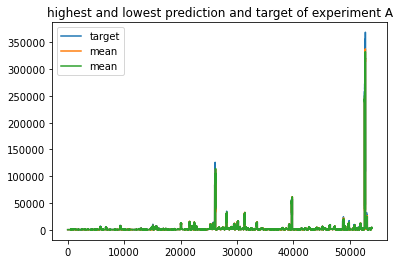

In [95]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[36]['mean'].plot(legend=True)
sorted_forcast_list1[42]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

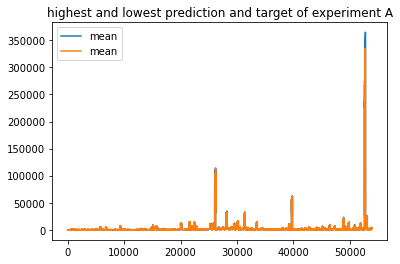

In [96]:
plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[4]['mean'].plot(legend=True)
sorted_forcast_list1[93]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

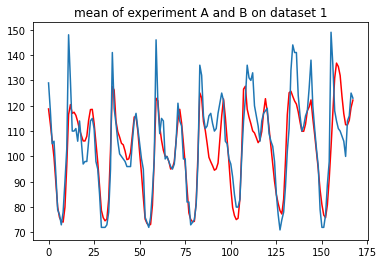

In [97]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='r')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

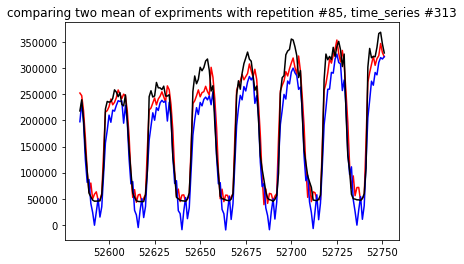

In [103]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

# plot mean of only one time series
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')

rep_no = 0
ts_list1[rep_no]['mean'].plot(color='red')
# ts_list2[rep_no]['mean'].plot()

rep_no = 85
ts_list1[rep_no]['mean'].plot(color='blue')

rep_no = 85
ts_list1[rep_no]['target'].plot(color='black')
